In [1]:
# Import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.constraints import maxnorm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# To Load dataset

filename = "./Wine Quality/wine.csv"
df = pd.read_csv(filename, index_col='index')
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe

In [3]:
# To convert binary classification of quality 
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [4]:
# Creating a test/train split

X = df.iloc[:, 0:11]
y= df.iloc[:, 11]

# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [5]:
# Create the normalization
norm = MinMaxScaler()

norm_fit = norm.fit(X_train)
scaled_Xtrain = norm_fit.transform(X_train)

scaled_Xtest = norm_fit.transform(X_test)

In [6]:
# Function to create model, required for KerasClassifier

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(1)))
model.add(Dense(30, kernel_initializer='glorot_normal', activation='relu', kernel_constraint=maxnorm(1)))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mse', optimizer=Adam(learning_rate =0.001), metrics=['accuracy'])
    

# define the grid search parameters
history = model.fit(X_train, y_train, epochs=150, batch_size = 40, validation_split=0.1, verbose=1)


Epoch 1/150
117/117 [==============================] - 3s 7ms/step - loss: 0.2522 - accuracy: 0.6111 - val_loss: 0.2249 - val_accuracy: 0.6481
Epoch 2/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.6280 - val_loss: 0.2147 - val_accuracy: 0.6558
Epoch 3/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.6310 - val_loss: 0.2126 - val_accuracy: 0.6577
Epoch 4/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.6397 - val_loss: 0.2199 - val_accuracy: 0.6442
Epoch 5/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.6511 - val_loss: 0.2065 - val_accuracy: 0.6615
Epoch 6/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.6481 - val_loss: 0.2316 - val_accuracy: 0.6365
Epoch 7/150
117/117 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.6553 - val_loss: 0.2331 - val_accuracy: 0.6404

Epoch 58/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.7203 - val_loss: 0.1811 - val_accuracy: 0.7192
Epoch 59/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1756 - accuracy: 0.7364 - val_loss: 0.1811 - val_accuracy: 0.7212
Epoch 60/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.7289 - val_loss: 0.1839 - val_accuracy: 0.7115
Epoch 61/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.7366 - val_loss: 0.1824 - val_accuracy: 0.7288
Epoch 62/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.7336 - val_loss: 0.1811 - val_accuracy: 0.7154
Epoch 63/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.7327 - val_loss: 0.1796 - val_accuracy: 0.7231
Epoch 64/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.7334 - val_loss: 0.1873 - val_accuracy:

117/117 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.7496 - val_loss: 0.1806 - val_accuracy: 0.7250
Epoch 115/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.7430 - val_loss: 0.1744 - val_accuracy: 0.7385
Epoch 116/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.7391 - val_loss: 0.1883 - val_accuracy: 0.6923
Epoch 117/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.7441 - val_loss: 0.1807 - val_accuracy: 0.7115
Epoch 118/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.7370 - val_loss: 0.1788 - val_accuracy: 0.7365
Epoch 119/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.7436 - val_loss: 0.1766 - val_accuracy: 0.7212
Epoch 120/150
117/117 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.7458 - val_loss: 0.1896 - val_accuracy: 0.7288

In [7]:
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

[[0.8986759 ]
 [0.6851587 ]
 [0.66084814]
 ...
 [0.94337547]
 [0.90730596]
 [0.17310503]]


In [8]:
# evaluate the train set
scores_train = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_train[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

163/163 [==============================] - 1s 4ms/step - loss: 0.1663 - accuracy: 0.7510: 0s - loss: 0.1663 - accuracy: 

loss: 16.63%

accuracy: 75.10%


In [9]:
# evaluate the test set
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.7469

loss: 17.20%

accuracy: 74.69%


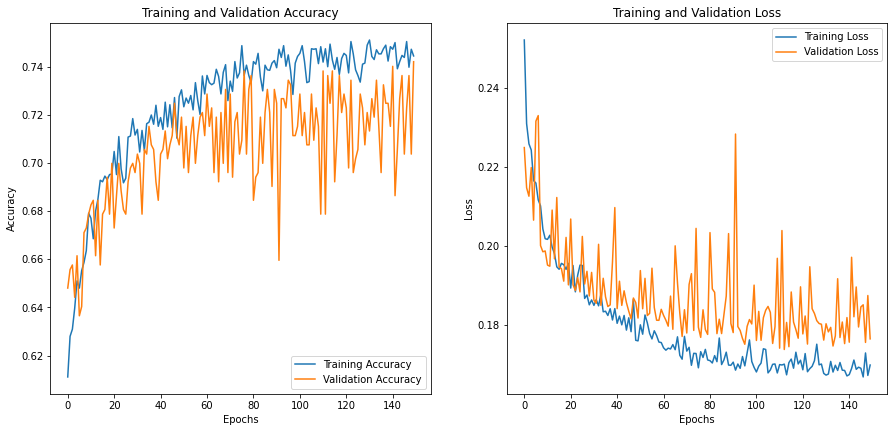

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# To change type of the y_pred 
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [12]:
# To see the classifiaction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.49      0.59       477
           1       0.75      0.89      0.82       823

    accuracy                           0.75      1300
   macro avg       0.74      0.69      0.70      1300
weighted avg       0.74      0.75      0.73      1300



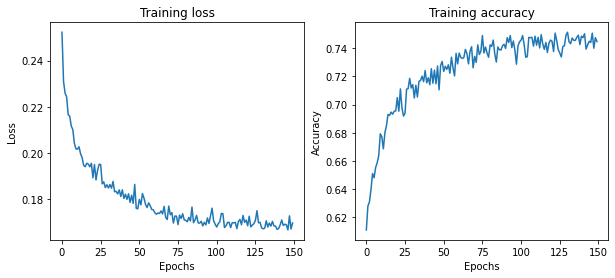

In [13]:
# To plot train accuracy and loss
loss = history.history['loss']
accuracy = history.history['accuracy']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

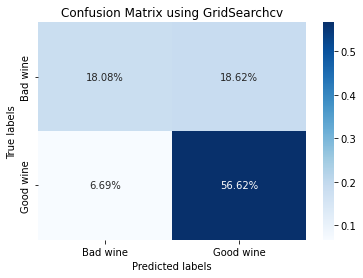

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap=plt.cm.Blues) # annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix using GridSearchcv')
ax.xaxis.set_ticklabels(['Bad wine', 'Good wine']); ax.yaxis.set_ticklabels(['Bad wine', 'Good wine']);
plt.show()